In [11]:
import networkx as nx
from cdt.causality.graph import GES, PC, GIES
from cdt.data import load_dataset
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder


In [23]:
df = pd.read_parquet('../data/df_final_label.parquet').sort_values(by=['data'])
df = df[df.data > '2019-01-01']

themes = ["tema1","tema2"]
# keyw = [feature for feature in df.columns if feature.startswith('keyw_')]
acoes = [feature for feature in df.columns if feature.startswith('acoes_')]
at_twitter = [feature for feature in df.columns if feature.startswith('atividade_twitter')]
autorias = [feature for feature in df.columns if feature.startswith('aut_')]
disc = [feature for feature in df.columns if feature.startswith('dis_')]
peso = [feature for feature in df.columns if feature.startswith('peso_')]
doacoes = [feature for feature in df.columns if feature.startswith('doacoes_')]
partido = ['partido']
features =  themes + acoes + at_twitter + autorias + disc + peso + doacoes + partido

target = ['voto']

#df = df[features].dropna()#.drop(columns=['keyw_None'])

In [24]:
features = ['partido', 'tema2', 'tema1', 'dis_num_seguiu', 'doacoes_donation_value', 'keyw_alteracao', 'dis_votos_validos', 'keyw_criacao']

In [25]:
categorical_features=["tema1","tema2","partido","doacoes_main_donation"]
encoder = LabelEncoder()
original = df[categorical_features]
mask = df[categorical_features].isnull()
df[categorical_features] = df[categorical_features].fillna('NaN')
df[categorical_features] = df[categorical_features].apply(encoder.fit_transform)
df[categorical_features].where(~mask, original)
df[categorical_features].astype('category')
df

,id_votacao,id_parlamentar,id_parlamentar_parlametria,partido,voto,casa_x,id_proposicao,data,obj_votacao,casa_y,...,dis_disciplina,peso_investimento_partidario,peso_numero_de_mandatos,peso_indice_comissoes,peso_indice_liderancas,peso_indice_cargo_mesa,peso_indice_peso_politico,doacoes_id_parlamentar,doacoes_main_donation,doacoes_donation_value
224037,2179189-45,204571,1204571,9,1,camara,2179189.0,2019-02-12 16:26:57,0,camara,...,0.000000,0.000000,1.0,0.022727,0.000,0.0,0.037879,204571.0,5,22500.000000
70819,2179189-45,204517,1204517,12,1,camara,2179189.0,2019-02-12 16:26:57,0,camara,...,0.000000,0.000000,1.0,0.045455,0.000,0.0,0.042424,204517.0,5,13250.000000
224614,2179189-45,74273,174273,21,1,camara,2179189.0,2019-02-12 16:26:57,0,camara,...,0.000000,0.159804,5.0,0.022727,0.000,0.0,0.203173,74273.0,4,4410.000000
156266,2179189-45,204352,1204352,21,0,camara,2179189.0,2019-02-12 16:26:57,0,camara,...,0.000000,0.664452,4.0,0.386364,0.250,0.0,0.393496,204352.0,7,3000.000000
156857,2179189-45,204531,1204531,14,1,camara,2179189.0,2019-02-12 16:26:57,0,camara,...,0.000000,0.092610,1.0,0.204545,0.250,0.0,0.142765,204531.0,5,8333.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148877,2272137-269,178835,1178835,9,0,camara,2272137.0,2021-03-12 00:01:37,"Votação do DTQ 8: PT: Destaque, com vistas à r...",camara,...,1.000000,0.322327,3.0,0.022727,0.250,0.0,0.219011,178835.0,7,270187.500000
69095,2272137-269,198197,1198197,0,1,camara,2272137.0,2021-03-12 00:01:37,"Votação do DTQ 8: PT: Destaque, com vistas à r...",camara,...,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21,NaN
248742,2272137-269,141553,1141553,24,1,camara,2272137.0,2021-03-12 00:01:37,"Votação do DTQ 8: PT: Destaque, com vistas à r...",camara,...,0.523810,0.080061,6.0,0.022727,0.000,0.0,0.220558,141553.0,6,129694.444444
86439,2272137-269,160531,1160531,32,1,camara,2272137.0,2021-03-12 00:01:37,"Votação do DTQ 8: PT: Destaque, com vistas à r...",camara,...,1.000000,0.629602,3.0,0.022727,0.375,0.0,0.305466,NaN,21,NaN


In [26]:
obj = GES()
#The predict() method works without a graph, or with a
#directed or udirected graph provided as an input
output = obj.predict(df[features])    #No graph provided as an argument

In [27]:
# output = obj.predict(df)

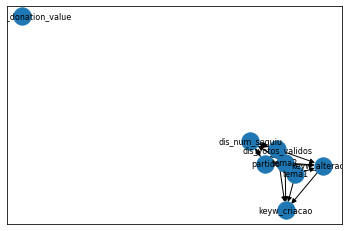

In [28]:
nx.draw_networkx(output, font_size=8)
plt.show()

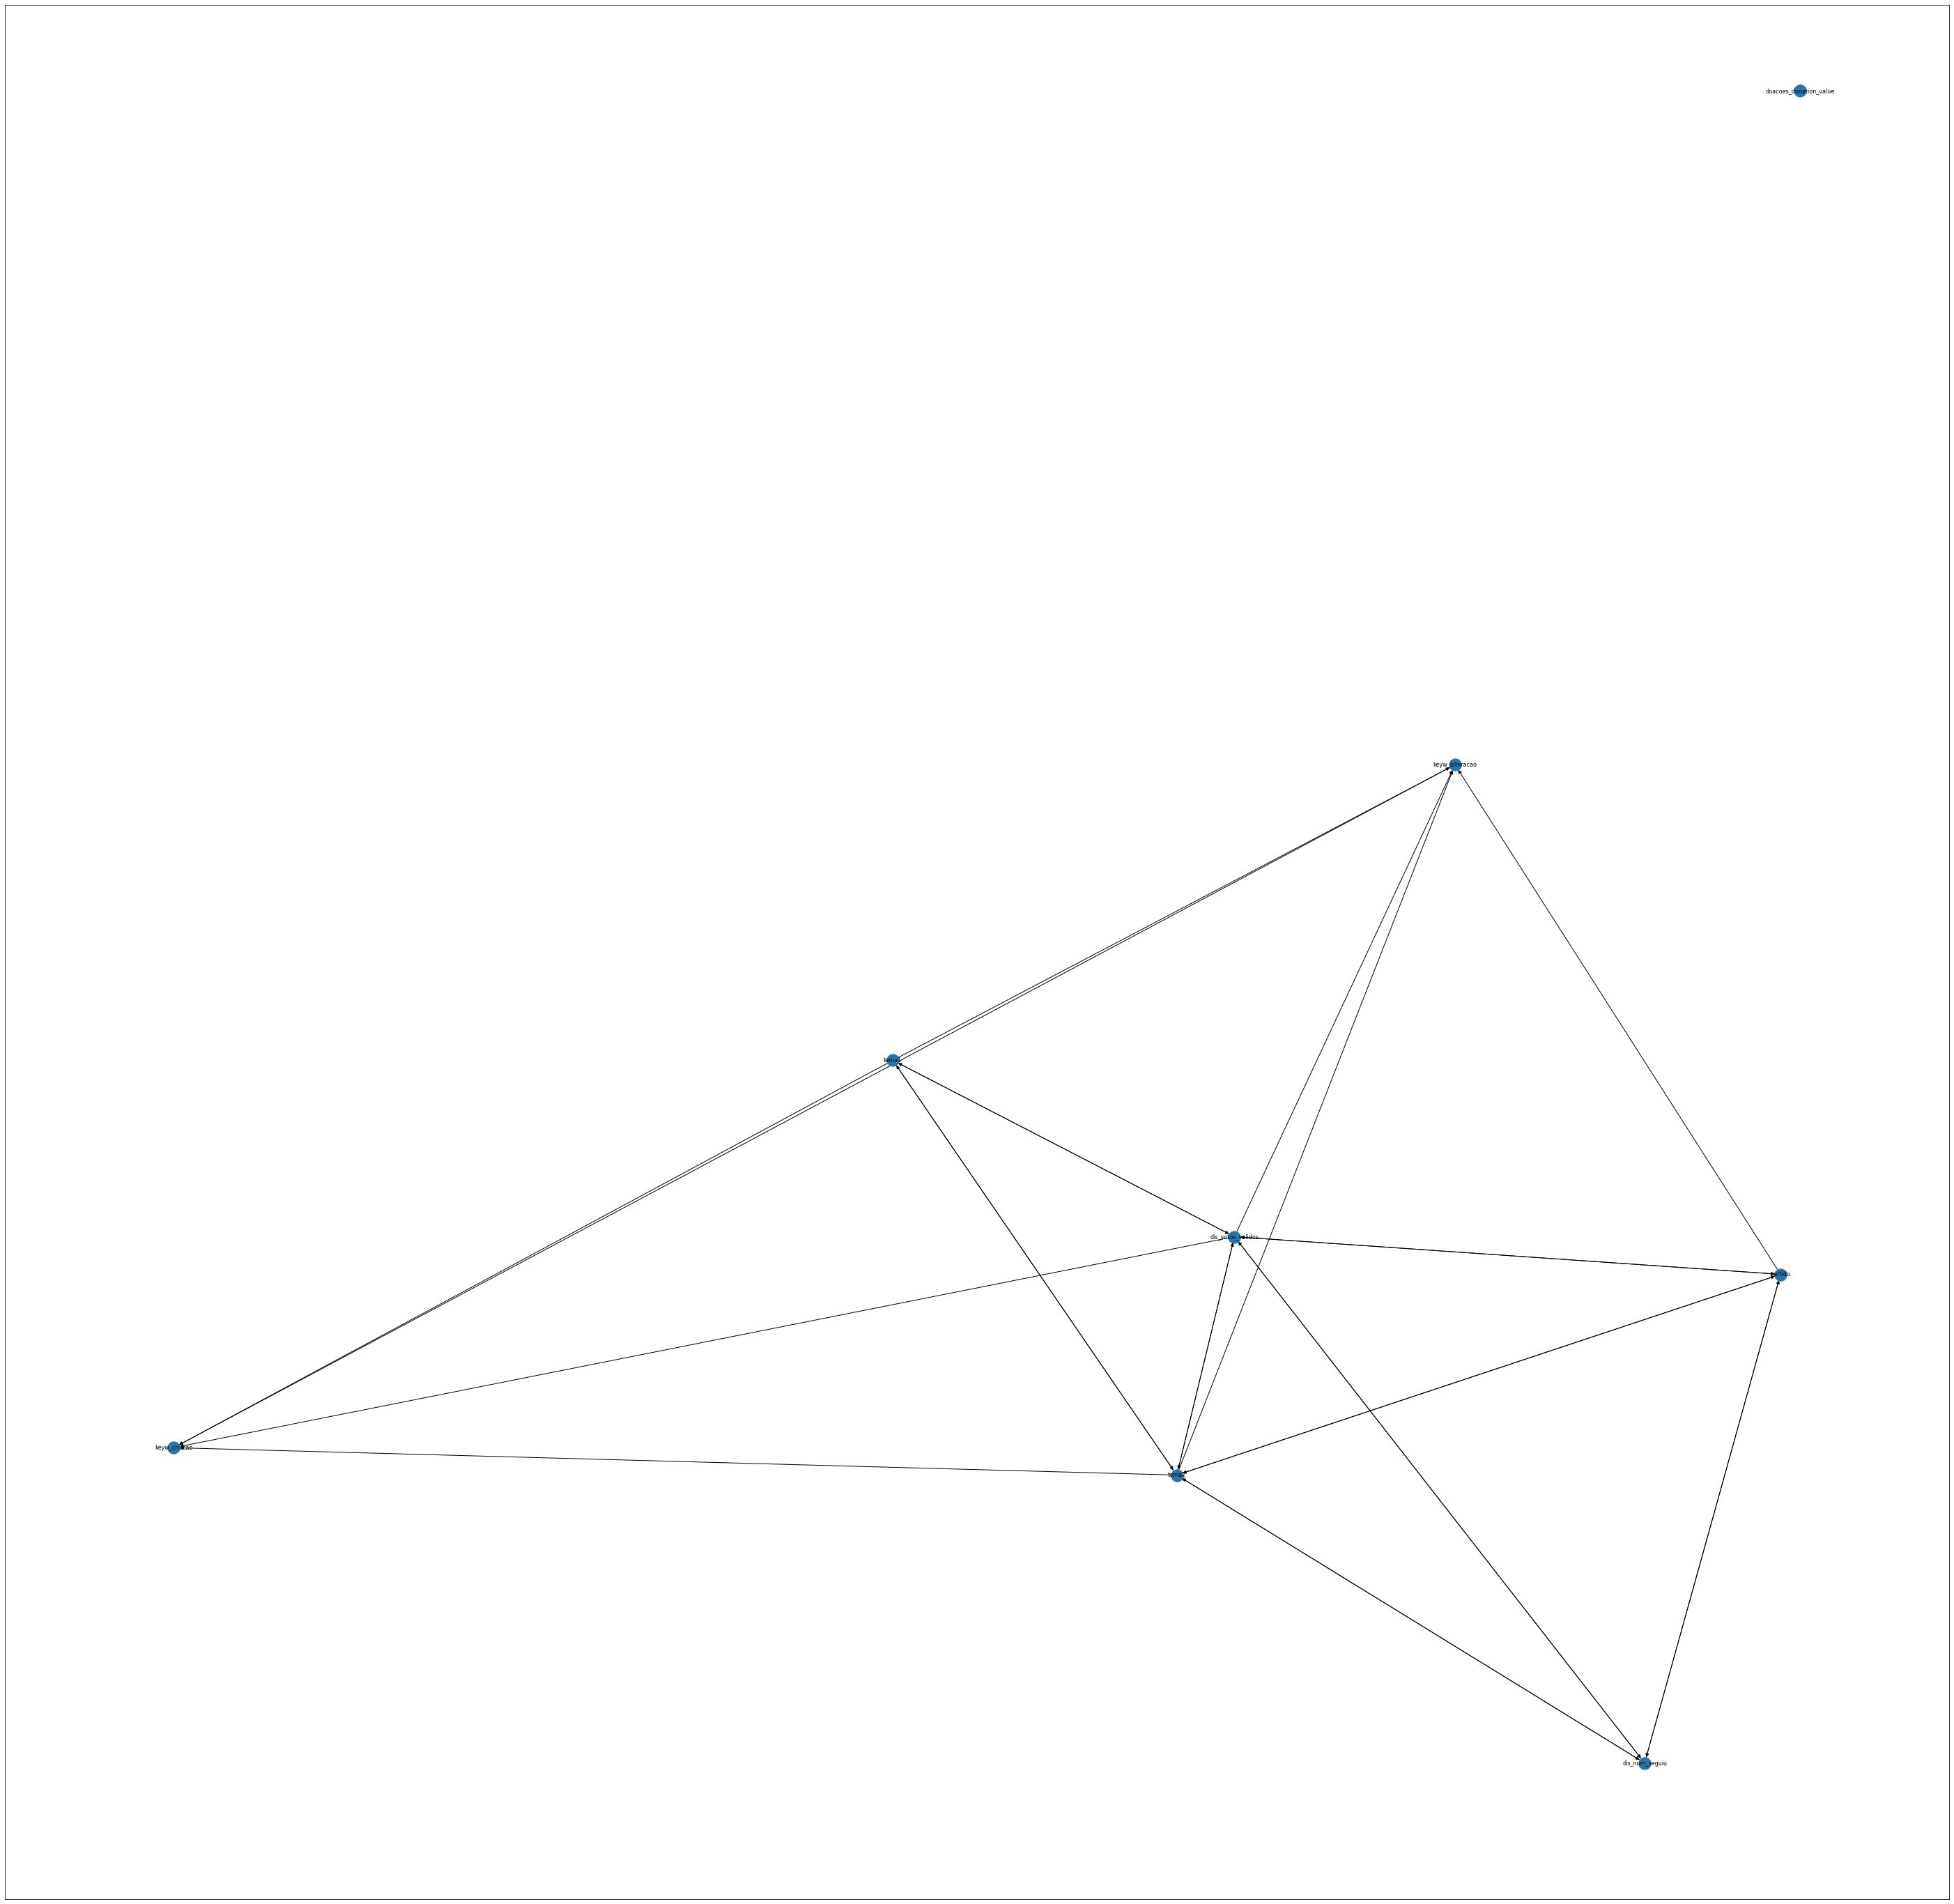

In [29]:
plt.figure(3,figsize=(50,50)) 
nx.draw_networkx(output, font_size=8)
plt.show()